### 감귤 착과량 예측 AI 경진대회

https://dacon.io/competitions/official/236038/overview/description


- ID : 과수나무 고유 ID

- 착과량(int) : 실제 감귤 착과량 (Target)

- 나무 생육 상태 Features (5개): 수고(m), 수관폭1(min), 수관폭2(max), 수관폭평균(수관폭1과 수관폭2의 평균) (데이터 기입은 cm 단위)

- 새순 Features (89개): 2022년 09월 01일 ~ 2022년 11월 28일에 일별 측정된 새순 데이터

- 엽록소 Features (89개): 2022년 09월 01일 ~ 2022년 11월 28일에 일별 측정된 엽록소 데이터



- 목적: 감귤나무의 나무 생육 상태, 엽록소 및 새순 정보로부터 감귤 착과량을 회귀 예측


- 시간이 경과할 수록 새순 피처의 변화, 엽록소 피처의 변화를 따로 봐야할 것 같음


- 감귤 착과량에 가장 영향을 많이 주는 피처를 찾기/나무 생육 상태 5가지에 따른 착과량 비교하기

#### 데이터 전체적으로 살펴보기(결측치 확인, 기술통계량 등)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

In [2]:
gyul_train_df = pd.read_csv('./jeju_mandarin/train.csv')
gyul_test_df = pd.read_csv('./jeju_mandarin/test.csv')

In [4]:
gyul_train_df

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,TRAIN_2202,119,230.0,353.0,367.0,360.0,4.7,4.6,4.5,4.5,...,66.347384,66.293609,66.193131,66.176590,66.109845,66.008775,65.889675,65.734066,65.586656,65.560547
2203,TRAIN_2203,611,266.0,337.0,400.0,368.5,3.1,3.0,3.0,3.0,...,73.438844,73.432194,73.355195,73.329491,73.271361,73.088750,73.071705,73.069036,72.952559,72.944396
2204,TRAIN_2204,650,237.0,353.0,362.0,357.5,3.0,3.0,2.9,2.9,...,67.576066,67.404347,67.394009,67.247428,67.117025,66.933771,66.734617,66.572095,66.506006,66.479459
2205,TRAIN_2205,363,281.0,337.0,403.0,370.0,3.9,3.9,3.8,3.8,...,66.766379,66.602606,66.510781,66.334637,66.323613,66.248731,66.202532,66.108962,65.934979,65.812084


In [5]:
gyul_test_df

,ID,수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TEST_0000,231.0,219.0,302.0,260.5,4.3,4.2,4.2,4.1,4.1,...,72.091497,71.906176,71.886799,71.858720,71.725540,71.531618,71.476935,71.321237,71.184295,71.000223
1,TEST_0001,206.0,324.0,346.0,335.0,2.5,2.5,2.5,2.5,2.5,...,68.423776,68.353200,68.346777,68.188159,67.995233,67.879958,67.744820,67.673522,67.539973,67.447849
2,TEST_0002,282.0,373.0,404.0,388.5,4.7,4.7,4.6,4.6,4.5,...,74.435783,74.247468,74.142664,74.070401,73.892408,73.796143,73.615838,73.440136,73.387051,73.228319
3,TEST_0003,234.0,337.0,357.0,347.0,3.6,3.6,3.6,3.6,3.5,...,73.570735,73.420243,73.313538,73.149298,73.109599,72.924511,72.847411,72.838263,72.672156,72.538171
4,TEST_0004,222.0,329.0,347.0,338.0,2.7,2.7,2.7,2.7,2.6,...,72.216758,72.163153,72.052952,71.905982,71.766141,71.746813,71.668847,71.501043,71.419715,71.328224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,TEST_2203,217.0,265.0,288.0,276.5,2.5,2.5,2.4,2.4,2.4,...,70.567966,70.528762,70.333905,70.245126,70.186665,70.010219,69.916747,69.771722,69.737748,69.601365
2204,TEST_2204,182.0,191.0,262.0,226.5,4.1,4.1,4.1,4.0,4.0,...,66.545938,66.485657,66.408375,66.255137,66.206650,66.079592,65.951010,65.884988,65.719787,65.632342
2205,TEST_2205,254.0,280.0,332.0,306.0,3.8,3.8,3.8,3.7,3.7,...,63.254101,63.134023,63.035379,62.877995,62.681351,62.499735,62.421901,62.417195,62.323963,62.307955
2206,TEST_2206,257.0,285.0,297.0,291.0,4.5,4.4,4.4,4.3,4.3,...,64.331650,64.137868,64.045153,63.944310,63.916583,63.797809,63.762720,63.681733,63.512114,63.343589


In [13]:
gyul_train_df.isna().sum()

ID                0
착과량(int)          0
수고(m)             0
수관폭1(min)         0
수관폭2(max)         0
                 ..
2022-11-24 엽록소    0
2022-11-25 엽록소    0
2022-11-26 엽록소    0
2022-11-27 엽록소    0
2022-11-28 엽록소    0
Length: 184, dtype: int64

In [14]:
gyul_test_df.isna().sum()

ID                0
수고(m)             0
수관폭1(min)         0
수관폭2(max)         0
수관폭평균             0
                 ..
2022-11-24 엽록소    0
2022-11-25 엽록소    0
2022-11-26 엽록소    0
2022-11-27 엽록소    0
2022-11-28 엽록소    0
Length: 183, dtype: int64

In [16]:
gyul_train_df.describe()

,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
count,2207.000000,2207.00000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,...,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000
mean,406.222474,243.72995,315.186226,358.824196,337.005211,3.774807,3.736928,3.701495,3.663435,3.627503,...,68.992036,68.890661,68.791536,68.692934,68.593709,68.493569,68.393050,68.291350,68.192009,68.093096
std,218.978302,35.88914,66.327994,68.862898,64.859684,0.774181,0.764067,0.754751,0.745394,0.733896,...,4.124586,4.124429,4.125817,4.128586,4.130005,4.130072,4.131859,4.134976,4.135591,4.136995
min,1.000000,95.00000,95.000000,123.000000,109.000000,2.300000,2.200000,2.200000,2.200000,2.200000,...,54.246243,54.154888,54.143798,54.028089,53.884892,53.695860,53.649032,53.644994,53.450069,53.379849
25%,221.000000,223.00000,271.500000,313.500000,294.000000,3.100000,3.100000,3.050000,3.000000,3.000000,...,66.195524,66.075372,65.995234,65.906703,65.765257,65.691065,65.609606,65.487863,65.374528,65.278624
50%,404.000000,243.00000,316.000000,364.000000,340.500000,3.800000,3.700000,3.700000,3.700000,3.600000,...,69.048956,68.920295,68.841060,68.731164,68.647716,68.514740,68.392436,68.292889,68.207648,68.102235
75%,593.500000,267.00000,361.000000,402.000000,380.000000,4.400000,4.400000,4.300000,4.300000,4.300000,...,71.740281,71.615746,71.504264,71.390195,71.311027,71.227033,71.152030,71.038257,70.947707,70.850934
max,799.000000,381.00000,559.000000,584.000000,571.500000,5.300000,5.300000,5.200000,5.200000,5.100000,...,83.363883,83.227379,83.036103,82.978876,82.842139,82.722266,82.575149,82.491041,82.371832,82.321938


In [22]:
gyul_growth = gyul_train_df[['착과량(int)', '수고(m)', '수관폭1(min)', '수관폭2(max)', '수관폭평균']]
gyul_growth

,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균
0,692,275.0,287.0,292.0,289.5
1,534,293.0,284.0,336.0,310.0
2,634,300.0,392.0,450.0,421.0
3,639,289.0,368.0,379.0,373.5
4,496,306.0,353.0,358.0,355.5
...,...,...,...,...,...
2202,119,230.0,353.0,367.0,360.0
2203,611,266.0,337.0,400.0,368.5
2204,650,237.0,353.0,362.0,357.5
2205,363,281.0,337.0,403.0,370.0


In [23]:
gyul_growth.corr()

,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균
착과량(int),1.000000,0.007002,0.021279,0.037168,0.030611
수고(m),0.007002,1.000000,0.456394,0.484295,0.490456
수관폭1(min),0.021279,0.456394,1.000000,0.841330,0.957948
수관폭2(max),0.037168,0.484295,0.841330,1.000000,0.961049
수관폭평균,0.030611,0.490456,0.957948,0.961049,1.000000


<AxesSubplot: >

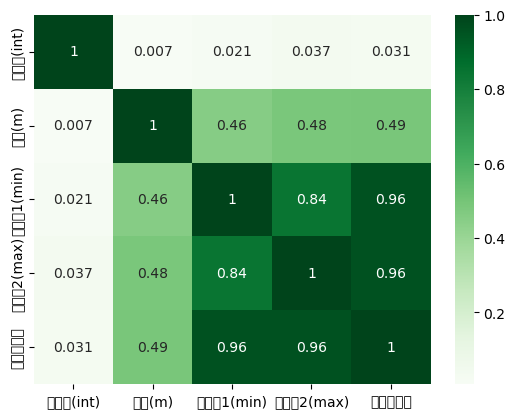

In [105]:
sns.heatmap(gyul_growth.corr(), cmap='Greens', annot=True)

- 나무 생육 상태 4가지와 착과량은 연관성이 크지 않음

In [47]:
saesun = gyul_train_df.iloc[:, 6:95]
saesun

,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,2022-09-07 새순,2022-09-08 새순,2022-09-09 새순,2022-09-10 새순,...,2022-11-19 새순,2022-11-20 새순,2022-11-21 새순,2022-11-22 새순,2022-11-23 새순,2022-11-24 새순,2022-11-25 새순,2022-11-26 새순,2022-11-27 새순,2022-11-28 새순
0,2.8,2.8,2.7,2.7,2.7,2.7,2.6,2.6,2.6,2.6,...,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.7,0.6
1,3.3,3.3,3.3,3.2,3.2,3.1,3.1,3.1,3.0,3.0,...,0.7,0.7,0.6,0.6,0.6,0.5,0.0,0.0,0.0,0.0
2,3.0,2.9,2.9,2.9,2.9,2.8,2.8,2.8,2.8,2.7,...,0.8,0.8,0.7,0.7,0.7,0.7,0.6,0.6,0.6,0.5
3,3.1,3.0,3.0,3.0,3.0,2.9,2.9,2.9,2.8,2.8,...,0.9,0.9,0.9,0.8,0.8,0.8,0.8,0.7,0.7,0.7
4,3.7,3.6,3.6,3.6,3.5,3.5,3.5,3.4,3.4,3.3,...,0.9,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.6,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,4.7,4.6,4.5,4.5,4.4,4.4,4.3,4.3,4.2,4.2,...,0.8,0.8,0.8,0.7,0.7,0.6,0.6,0.5,0.0,0.0
2203,3.1,3.0,3.0,3.0,2.9,2.9,2.9,2.9,2.8,2.8,...,0.9,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.6
2204,3.0,3.0,2.9,2.9,2.9,2.9,2.8,2.8,2.8,2.8,...,0.8,0.8,0.7,0.7,0.7,0.7,0.6,0.6,0.6,0.5
2205,3.9,3.9,3.8,3.8,3.8,3.7,3.7,3.6,3.6,3.6,...,0.8,0.8,0.8,0.7,0.7,0.7,0.6,0.6,0.5,0.0


In [73]:
saesun.mean()

2022-09-01 새순    3.774807
2022-09-02 새순    3.736928
2022-09-03 새순    3.701495
2022-09-04 새순    3.663435
2022-09-05 새순    3.627503
                   ...   
2022-11-24 새순    0.682102
2022-11-25 새순    0.632170
2022-11-26 새순    0.559991
2022-11-27 새순    0.454599
2022-11-28 새순    0.352832
Length: 89, dtype: float64

C:\Users\Administrator\anaconda3\envs\test\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49352 (\N{HANGUL SYLLABLE SAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\anaconda3\envs\test\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


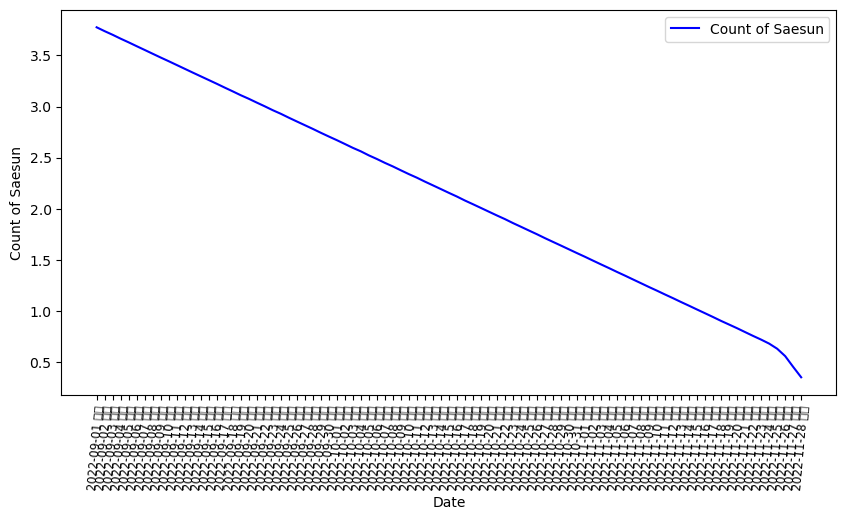

In [103]:
plt.figure(figsize=(10,5))
plt.plot(saesun.mean(), color = u'blue', linestyle='-', label='Count of Saesun')
plt.xticks(rotation=85, fontsize='small')
plt.xlabel('Date')
plt.ylabel('Count of Saesun')
plt.legend()
plt.show()

- 각 날짜마다 모든 새순 개수의 평균 내기 >> 시간이 지날수록 새순 개수 줄어듬

In [31]:
yeoprokso = gyul_train_df.iloc[:, 96:]
yeoprokso

,2022-09-02 엽록소,2022-09-03 엽록소,2022-09-04 엽록소,2022-09-05 엽록소,2022-09-06 엽록소,2022-09-07 엽록소,2022-09-08 엽록소,2022-09-09 엽록소,2022-09-10 엽록소,2022-09-11 엽록소,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,78.243462,78.166501,78.127526,78.058021,77.915689,77.861660,77.746645,77.592138,77.572477,77.382045,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,79.974397,79.890399,79.709278,79.531061,79.348139,79.151023,79.128739,79.084197,78.924476,78.893248,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,78.941452,78.928197,78.741878,78.713691,78.654247,78.461743,78.323264,78.219696,78.123820,78.036095,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,77.839523,77.815607,77.644644,77.546555,77.480441,77.383665,77.282036,77.126354,77.121300,77.043015,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,76.186572,76.031032,75.886553,75.736449,75.735036,75.642223,75.458496,75.380945,75.272054,75.098676,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,73.876933,73.853205,73.721799,73.666974,73.540144,73.449933,73.349051,73.310852,73.273704,73.095956,...,66.347384,66.293609,66.193131,66.176590,66.109845,66.008775,65.889675,65.734066,65.586656,65.560547
2203,81.898801,81.769536,81.607251,81.456723,81.408951,81.312932,81.181893,81.027196,81.010124,80.856318,...,73.438844,73.432194,73.355195,73.329491,73.271361,73.088750,73.071705,73.069036,72.952559,72.944396
2204,75.451905,75.315223,75.252547,75.186170,75.099348,75.093451,75.050447,74.877088,74.711044,74.594046,...,67.576066,67.404347,67.394009,67.247428,67.117025,66.933771,66.734617,66.572095,66.506006,66.479459
2205,74.017373,73.886675,73.720486,73.712709,73.532512,73.352104,73.230786,73.183439,73.006241,72.871891,...,66.766379,66.602606,66.510781,66.334637,66.323613,66.248731,66.202532,66.108962,65.934979,65.812084


In [53]:
yeoprokso.mean()

2022-09-02 엽록소    76.801492
2022-09-03 엽록소    76.699545
2022-09-04 엽록소    76.599512
2022-09-05 엽록소    76.500475
2022-09-06 엽록소    76.398598
                    ...    
2022-11-24 엽록소    68.493569
2022-11-25 엽록소    68.393050
2022-11-26 엽록소    68.291350
2022-11-27 엽록소    68.192009
2022-11-28 엽록소    68.093096
Length: 88, dtype: float64

C:\Users\Administrator\anaconda3\envs\test\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50685 (\N{HANGUL SYLLABLE YEOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\anaconda3\envs\test\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47197 (\N{HANGUL SYLLABLE ROG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\anaconda3\envs\test\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


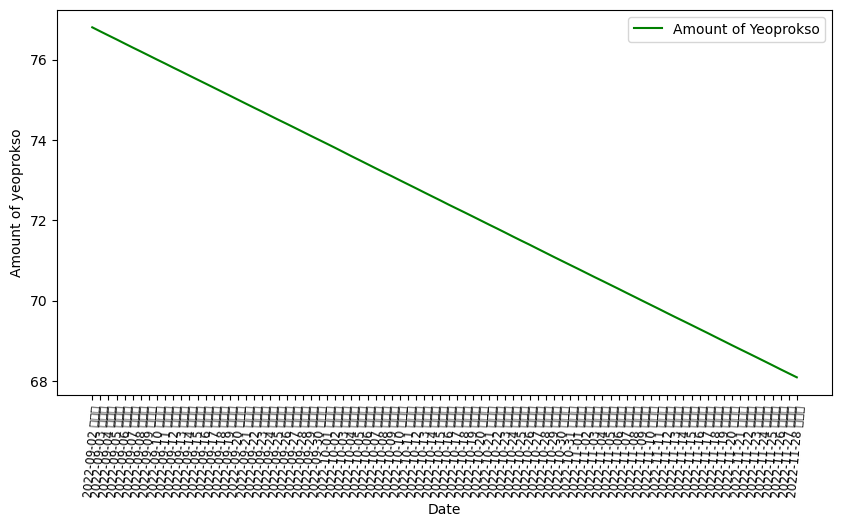

In [98]:
plt.figure(figsize=(10,5))
plt.plot(yeoprokso.mean(), color = u'green', linestyle='-', label='Amount of Yeoprokso')
plt.xticks(rotation=85, fontsize='small')
plt.xlim()
plt.xlabel('Date')
plt.ylabel('Amount of yeoprokso')
plt.legend()
plt.show()

- 각 날짜마다 모든 엽록소의 양 평균 내기 >> 시간이 지날수록 줄어듬

- 시계열성 데이터 그래프 효과적으로 그리는거 찾아보기
- 새순 개수, 엽록소 양 대비 착과량 변화 찾고 시각화하기
- 훈련용 데이터에서 Id랑 target 드랍하기
- 테스트용 데이터에서 id 드랍하기
- 데이터 분리하고 모델 선정, 학습하기
- 결과 내고 모델 평가하기..

https://dacon.io/competitions/official/236038/codeshare/7279?page=3&dtype=recent